# B3C-CTR1 Exercice 3.4

Une réaction irréversible du premier ordre se produit dans un réacteur CSTR:

$$A \to 𝐵+𝐶$$

Si 𝑘=0.01 (s<sup>-1</sup>), la concentration de A à l’entrée du réacteur est de 𝐶_𝐴0=3 (kmol/m3) et le flux volumique est de 0.001 m<sup>3</sup>/s, calculer le volume du réacteur et le temps de passage pour atteindre une conversion de 30 %.


In [15]:
# On commence par renseigner Python au sujet des packages à utiliser
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


La description du problème est relativement simple ici. Nous avons quatre constantes à décrire pour démarrer: la constante de vitesse, le débit volumique et le temps de passage.

In [16]:
# Constantes
k = 0.01 # (1/s)
Vdot = 2 # (L/s)
tau = 50 # (s)

Comme toujours, on définit les équations différentielles à résoudre dans une fonction. Ici, j'ai choisi d'appeler ma fonction bilans():

In [17]:
def bilans(y, t, k, CA0, CB0, CC0, tau):
    CA, CB, CC = y

    # loi de vitesse
    r = k * CA

    # Vitesses de transformation
    RA = -r
    RB = r
    RC = r

    # Bilans de matière
    dCA = (1/tau) * CA0 - (1/tau) * CA + RA
    dCB = (1/tau) * CB0 - (1/tau) * CB + RB
    dCC = (1/tau) * CC0 - (1/tau) * CC + RC

    return [dCA, dCB, dCC]

In [18]:
# Conditions initiales
CA0 = 3 # mol/L
CB0 = 0 # mol/L
CC0 = 0 # mol/L
y0 = [CA0, CB0, CC0] # mol/L

In [19]:
# Domaine d'intégration
t = np.linspace(0, 1000, 1001) # s

In [20]:
# Résolution à l'aide du solveur
y = odeint(bilans, y0, t, (k, CA0, CB0, CC0, tau))

Une fois le problème résolu, on peut tracer les profils de concentration en fonction du temps sur un graphique afin d'observer l'évolution:

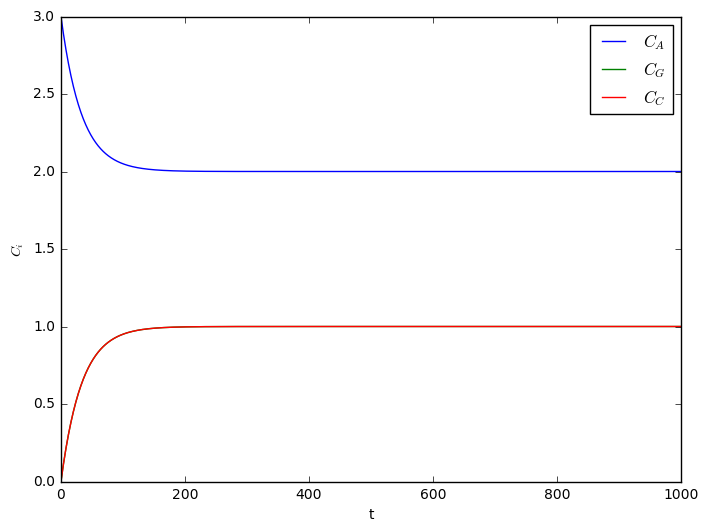

In [21]:
# Visualisation
plt.figure(1, figsize=(8, 6), dpi=100)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('$C_{i}$')
plt.legend (['$C_{A}$','$C_{G}$','$C_{C}$'])
plt.show()


On constate qu'après un temps de $5\tau$ plus ou moins, les concentrations ne varient plus. On a alors atteint ce qu'on appelle l'état stationnaire où l'accumulation vaut zéro. A partir de ce moment, les concentration en sortie de réacteur sont stables et il est possible de continuer à opérer le réacteur de cette manière pendant une longue durée.

Afin de répondre à la question posée, il faudrait varier $\tau$ de telle manière à trouver sa valeur particulière pour que le taux de conversion devienne 30 %.

Toutefois, comme nous nous intéressons uniquement à la résolution de l'état stationnaire. La résolution des équations différentielles comme ci-dessus pour un réacteur CSTR n'est en pratique pas nécessaire. En effet, il est préférable d'utiliser l'équation algébrique résultant du bilan de matière à l'état stationnaire. 

Ainsi, le temps de passage nécessaire pour atteindre une conversion de 30 % peut être déterminer comme suit:

In [22]:
CA0 = 3 # mol/L
X = 0.3 # -

tau = CA0 * X / (k * CA0 * (1-X))

print("tau vaut %.2f (s)." % (tau))

tau vaut 42.86 (s).


Ainsi, il faut un temps de séjour moyen de 42.9 s au mélange réactionnel dans le réacteur pour atteindre une conversion de 30 %.